In [988]:
import pandas as pd
train=pd.read_csv("data/train.csv")
test=pd.read_csv("data/test.csv")
#submit=pd.read_csv("data/sample_submission.csv")

# 1. 데이터 확인

In [989]:
train.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [990]:
train.shape
test.shape
train.columns
test.columns
train.info()  #train.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [991]:
#기술통계
train.describe()
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [992]:
train.isnull().sum() #train.isnull().sum(axis=0), 행 단위로 NaN을 셀때는 axis=1

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [993]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [994]:
train.isnull().sum()/train.shape[0] #각 컬럼별 NaN의 비율
test.isnull().sum()/test.shape[0] #각 컬럼별 NaN의 비율

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

# 2. 시각화
## 생존 여부에 대한 분포를 확인

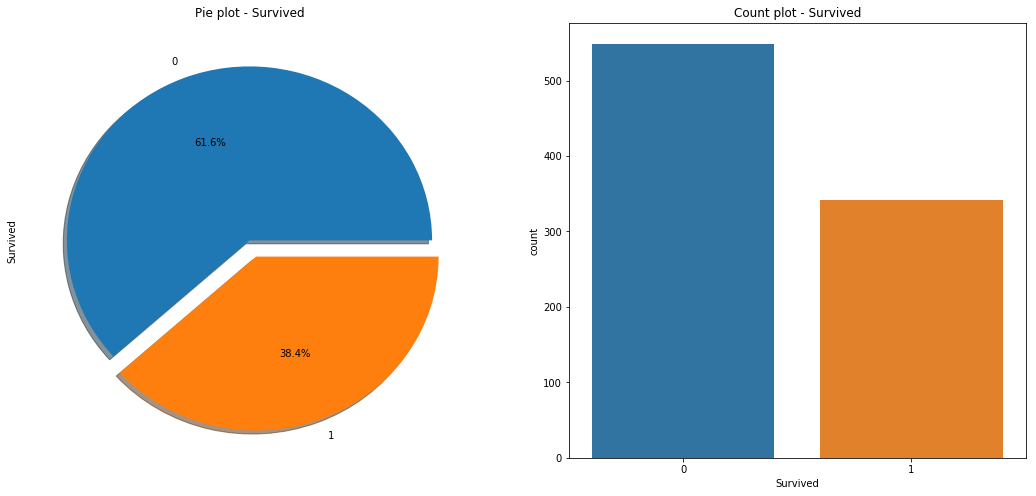

In [995]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax=plt.subplots(1,2,figsize=(18,8))
#train['Survived'].value_counts() #0(사망):549, 1(생존):342
train['Survived'].value_counts().plot.pie(ax=ax[0],autopct="%.1f%%",explode=[0,0.1],shadow=True) 
ax[0].set_title("Pie plot - Survived")
sns.countplot('Survived', data=train, ax=ax[1])
ax[1].set_title("Count plot - Survived")
plt.show()

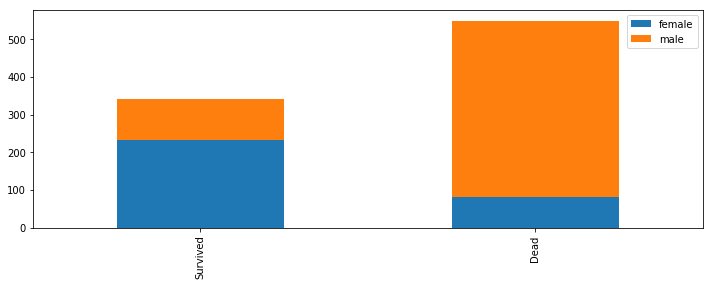

In [996]:
def survived_bar_chart(feature): #feature에 따른 생존 여부를 시각화하는 함수
    #feature가 Sex라면, 성별에 따른 생존여부를 시각화   
    survived=train[train['Survived']==1][feature].value_counts()
    dead=train[train['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=['Survived','Dead']
    #df.plot(kind='bar')
    df.plot(kind='bar', stacked=True, figsize=(12,4))
    #print(df)
    #print(type(dead)) 시리즈
#     print(survived)
#     print("="*50)
#     print(dead)
survived_bar_chart('Sex')

In [997]:
#train[train['Survived']==1]['Embarked'].value_counts()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


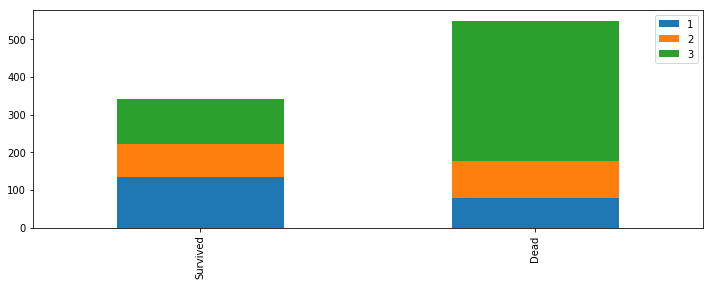

In [998]:
survived_bar_chart('Pclass')
#카테고리로 구성, 순서가 있음
#groupby, pivot를 이용하여 연산 수행
#pclass별 생존율

#pclass 그룹 별 데이터 카운트
#train[['Pclass', 'Survived']]
train[['Pclass', 'Survived']].groupby('Pclass').count()
#Pclass 별로 Survived 값들의 총 합을 출력

#Pclass 별로 생존자 수
train[['Pclass', 'Survived']].groupby('Pclass').sum()

#crosstab을 이용한 등실 별 생존자 수
#pd.crosstab(train['Pclass'], train['Survived'])
pd.crosstab(train['Pclass'], train['Survived'], margins=True)

#Pclass 별로 생존률
train[['Pclass', 'Survived']].groupby('Pclass').mean()

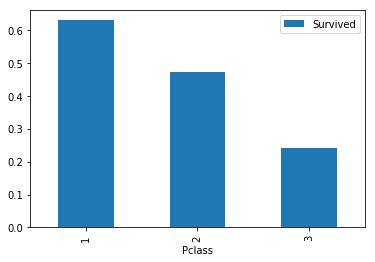

In [999]:
#등급 별 생존률을 시각화
train[['Pclass', 'Survived']].groupby('Pclass').mean().plot.bar()
#모델 만들때 등급 정보는 매우 중요하게 사용됨

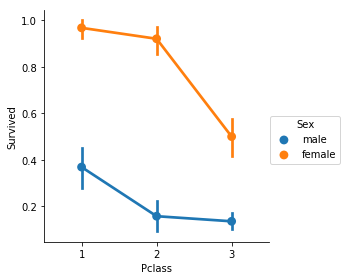

In [1000]:
#Sex, Pclass 두 개에 따라 생존의 변화
sns.factorplot('Pclass', 'Survived', data=train, hue='Sex',size=4)


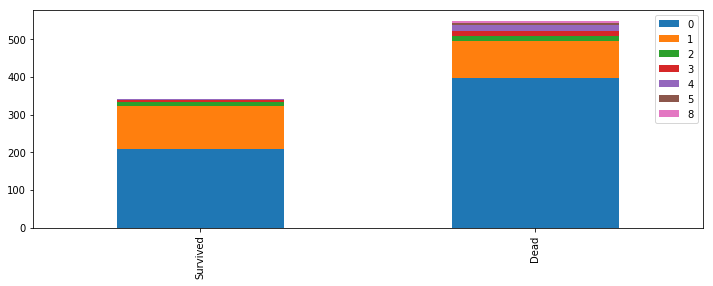

In [1001]:
survived_bar_chart('SibSp')

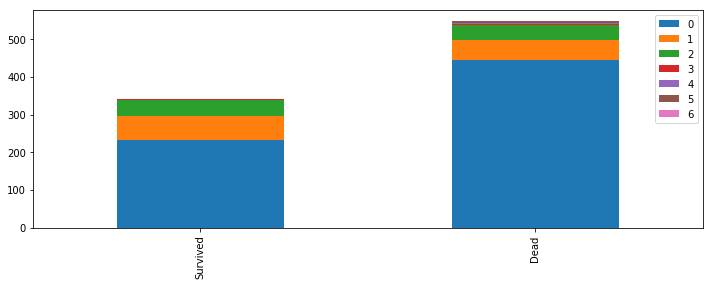

In [1002]:
survived_bar_chart('Parch')

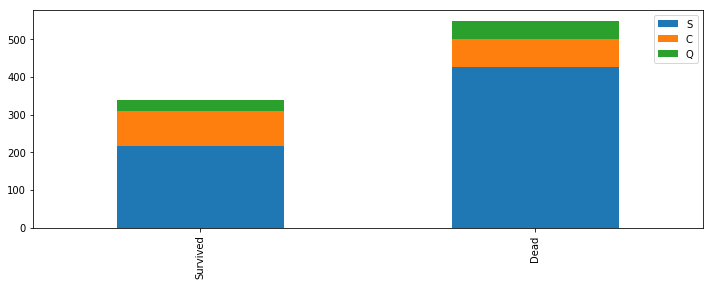

In [1003]:
survived_bar_chart('Embarked')

C:\Users\B-8\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


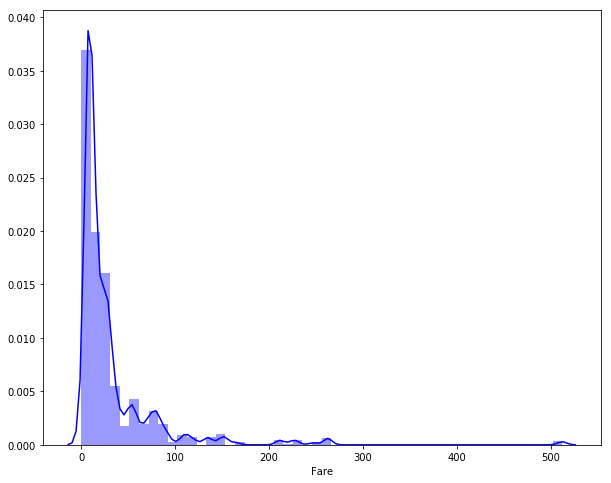

In [1004]:
#survived_bar_chart('Fare')
#Fare는 연속데이터 이므로...막대 바 그래프로 그리면 매우 곤란함.
#연속데이터는 히스토그램으로 그리는게 무난함.
fig,ax=plt.subplots(1,1,figsize=(10,8))
sns.distplot(train['Fare'], ax=ax, color='b')


In [1005]:
#Cabin은 NaN이 많으므로 모델에 포함/비포함은 각자 판단
#train['Cabin'].isnull()
#train['Cabin'].isnull().sum() #NaN의 개수
train['Cabin'].isnull().sum()/train.shape[0] #약 77%가 NaN -> 모델링에서 제외

0.7710437710437711

In [1006]:
train['Ticket'].value_counts()
#Ticket은 NaN이 없음. Ticket 컬럼의 값에 대한 특성 공학은 앞으로도 계속 고민...

CA. 2343              7
1601                  7
347082                7
347088                6
3101295               6
CA 2144               6
382652                5
S.O.C. 14879          5
113760                4
PC 17757              4
LINE                  4
W./C. 6608            4
19950                 4
4133                  4
113781                4
17421                 4
347077                4
2666                  4
349909                4
PC 17755              3
PC 17572              3
110152                3
PC 17582              3
C.A. 34651            3
29106                 3
24160                 3
248727                3
13502                 3
35273                 3
347742                3
                     ..
345769                1
112379                1
113783                1
234360                1
330979                1
SOTON/O.Q. 3101307    1
112059                1
312993                1
A4. 54510             1
SC/AH 3085            1
C.A. 29566      

In [1007]:
import re
#p=re.compile('([A-Za-z]+)')
train_test_data= [train, test]
#dataset에 Title컬럼을 추가하면, 자동으로 train, test에도 동일하게 추가
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)')
#print(dataset['Title'])    
print(test['Title'])   
    
#Ford, Mr. William Neal => Mr.
# for dataset in train_test_data:
#     dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)')
#     print(dataset['Title'])


#print("abc1234def".extract('(\d+)').astype(int))
#df['column_name'].str.extract('(\d+)').astype(int)
#주어진 문자열에서 숫자문자를 추출한 후 정수타입으로 변환

0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
5          Mr
6        Miss
7          Mr
8         Mrs
9          Mr
10         Mr
11         Mr
12        Mrs
13         Mr
14        Mrs
15      Carlo
16         Mr
17         Mr
18       Miss
19     Khalil
20         Mr
21     Master
22        Mrs
23         Mr
24        Mrs
25         Mr
26       Miss
27         Mr
28         Mr
29         Mr
        ...  
388        Mr
389    Master
390        Mr
391       Mrs
392    Master
393        Mr
394        Mr
395       Mrs
396        Mr
397       Mrs
398        Mr
399        Mr
400      Miss
401        Mr
402      Miss
403        Mr
404        Mr
405        Mr
406        Mr
407        Mr
408      Miss
409      Miss
410      Miss
411       Mrs
412      Miss
413        Mr
414         y
415        Mr
416        Mr
417    Master
Name: Title, Length: 418, dtype: object


In [1008]:
# do*g
# dog, dg, doooog
# do+g
# dog, dooog,...
# do{2}g
# doog
# do{2,3}g
# doog, dooog
# ? == {0,1}
# do?g #o는 있어도 없어도 됨
# import re
# p=re.compile("[a-z]+")
# print(p.match("test"))
# print(p.match("te3st"))
# print(p.match("1te3st"))
# print(p.search("te3st"))
# print(p.search("1te3st"))


In [1009]:
train['Title'].value_counts()
test['Title'].value_counts()
title_mapping={
    'Mr':0,'Miss':1,'Mrs':2,'Master':3,'Dr':3,'Rev':3,'y':3,'Planke':3,'Impe':3,'Mlle':3,'Gordon':3,
    'Col':3,'Major':3,'Pelsmaeker':3,'Jonkheer':3,'Cruyssen':3,'Walle':3,'Mme':3,'Carlo':3,'Ms':3,
    'Mulder':3,'Capt':3,'Steen':3,'Don':3,'Billiard':3,'Velde':3,'Shawah':3,'Messemaeker':3,
    'Melkebeke':3,'der':3,'the':3,}
for dataset in train_test_data:
    dataset['Title']=dataset['Title'].map(title_mapping)

In [1010]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [1011]:
test.head()
#train['Title'].replace(['Ms',"Sir"], ["Miss","Mr"], inplace=True)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2.0


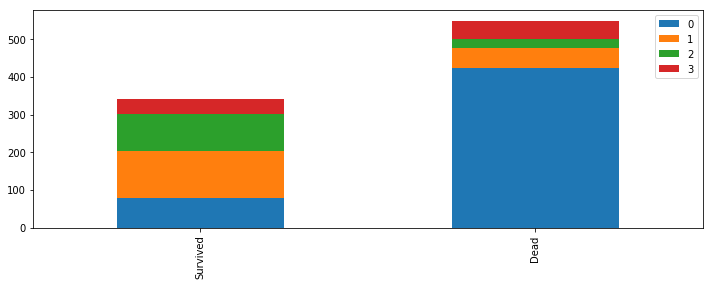

In [1012]:
survived_bar_chart('Title')

In [1013]:
train.drop('Name', axis=1, inplace=True)#Name컬럼은 필요없으므로 제거
train
#test.drop('Name', axis=1, inplace=True)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,female,14.0,1,0,237736,30.0708,NaN,C,2


In [1014]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,female,14.0,1,0,237736,30.0708,NaN,C,2


In [1015]:
#male:0, female:1
sex_mapping={"male":0, "female":1}
for dataset in train_test_data:
    dataset['Sex']=dataset['Sex'].map(sex_mapping)

In [1016]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


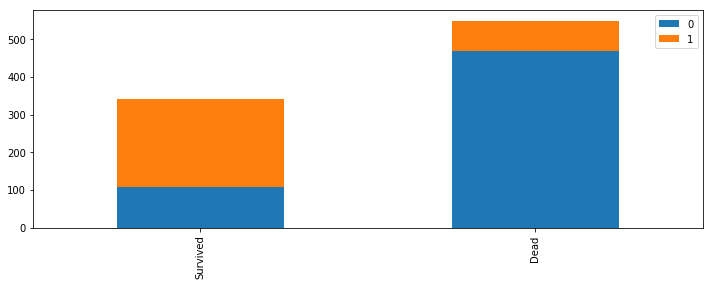

In [1017]:
survived_bar_chart('Sex')

In [1018]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [1019]:
#fillna시 특정 값으로 일괄 변환할때는 transform함수를 적용함
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"),inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"),inplace=True)

In [1020]:
train['Age']
test['Age']

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
5      14.0
6      30.0
7      26.0
8      18.0
9      21.0
10     28.0
11     46.0
12     23.0
13     63.0
14     47.0
15     24.0
16     35.0
17     21.0
18     27.0
19     45.0
20     55.0
21      9.0
22     36.5
23     21.0
24     48.0
25     50.0
26     22.0
27     22.5
28     41.0
29     28.0
       ... 
388    21.0
389     6.0
390    23.0
391    51.0
392    13.0
393    47.0
394    29.0
395    18.0
396    24.0
397    48.0
398    22.0
399    31.0
400    30.0
401    38.0
402    22.0
403    17.0
404    43.0
405    20.0
406    23.0
407    50.0
408    22.0
409     3.0
410    22.0
411    37.0
412    28.0
413    28.0
414    39.0
415    38.5
416    28.0
417    13.0
Name: Age, Length: 418, dtype: float64

In [1021]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,30.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


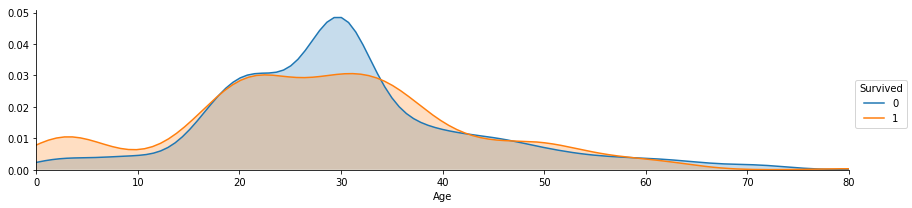

In [1022]:
facet=sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

(0, 20)

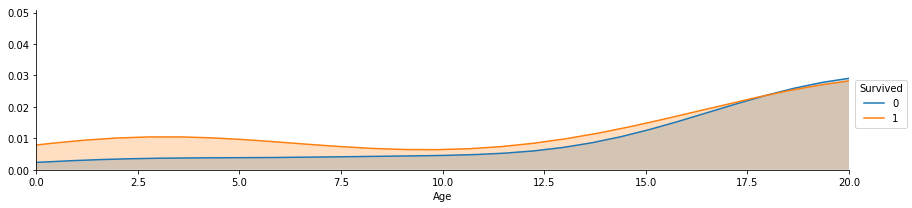

In [1023]:
facet=sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0,20)

(40, 60)

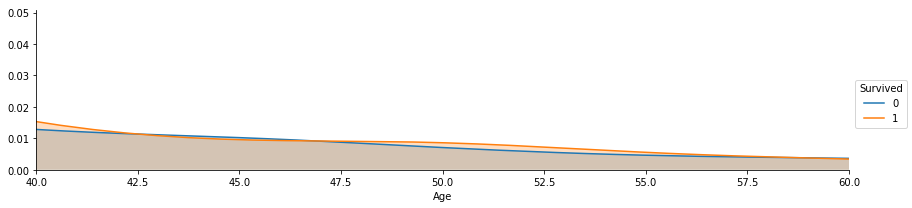

In [1024]:
facet=sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40,60)

In [1025]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.6+ KB


In [1026]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          415 non-null float64
dtypes: float64(3), int64(5), object(4)
memory usage: 39.3+ KB


In [1027]:
#binning : 구간 나누기
#child:0, young:1, adult:2, mid-age:3, senior:4
for dataset in train_test_data:
    dataset.loc[dataset['Age']<13, "Age"]=0,
    dataset.loc[ (dataset['Age']>=13) & (dataset['Age']<19), "Age"]=1,
    dataset.loc[ (dataset['Age']>=19) & (dataset['Age']<36), "Age"]=2,
    dataset.loc[ (dataset['Age']>=36) & (dataset['Age']<61), "Age"]=3,
    dataset.loc[ (dataset['Age']>=61), "Age"]=4
    #print(dataset.loc[dataset['Age']<13, "Age"])
    #print(dataset[dataset['Age']<13])

In [1028]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,2.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,1.0,1,0,237736,30.0708,NaN,C,2


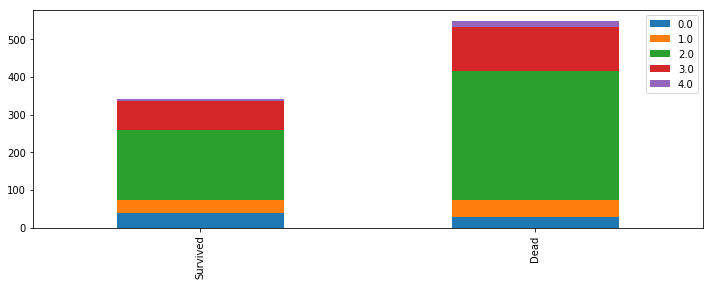

In [1029]:
survived_bar_chart('Age')

In [1030]:
#train['Embarked']
#선실 등급별(1,2,3) 항구(S,C,Q)의 합

Pclass1=train[train['Pclass']==1]['Embarked'].value_counts()#1등급실 항구의 합
Pclass2=train[train['Pclass']==2]['Embarked'].value_counts()#2등급실 항구의 합
Pclass3=train[train['Pclass']==3]['Embarked'].value_counts()#3등급실 항구의 합
print(Pclass1)
print(Pclass2)
print(Pclass3)

S    127
C     85
Q      2
Name: Embarked, dtype: int64
S    164
C     17
Q      3
Name: Embarked, dtype: int64
S    353
Q     72
C     66
Name: Embarked, dtype: int64


In [1031]:
df=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index=['1st class','2nd class','3rd class']
df

,S,C,Q
1st class,127,85,2
2nd class,164,17,3
3rd class,353,66,72


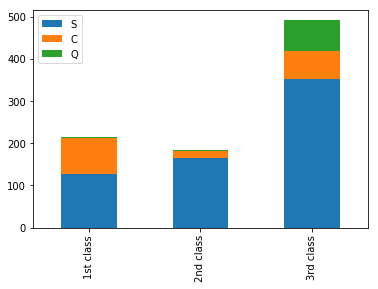

In [1032]:
df.plot(kind='bar',stacked=True)

In [1033]:
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].fillna('S')
train

#ddataset['Embarked']을 참조하여 S->0, C->1, Q->2로 일괄 변환(map함수 적용)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,2.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,1.0,1,0,237736,30.0708,NaN,C,2


In [1034]:
embarked_mapping={"S":0, "C":1, "Q":2}
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].map(embarked_mapping)

In [1035]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null int64
Title          891 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 83.6+ KB


(50, 100)

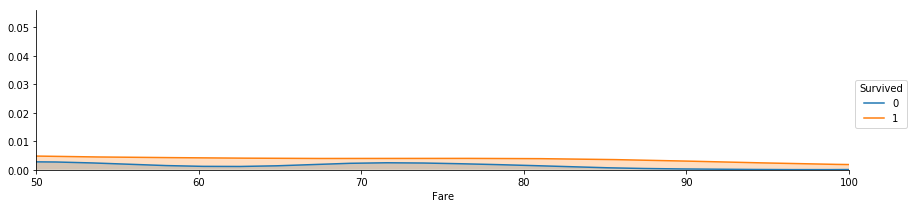

In [1036]:
facet=sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(50,100)

In [1037]:
#구간을 임의적으로 나누었지만, 추후에 내공이 쌓이면...표준화를 해보세요
for dataset in train_test_data:
    dataset.loc[dataset['Fare']<=20, "Fare"]=0,
    dataset.loc[ (dataset['Fare']>20) & (dataset['Fare']<=30), "Fare"]=1,
    dataset.loc[ (dataset['Fare']>30) & (dataset['Fare']<=100), "Fare"]=2,
    dataset.loc[ (dataset['Fare']>100), "Fare"]=3

In [1038]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,2.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,0.0,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,2.0,E46,0,0
7,8,0,3,0,0.0,3,1,349909,1.0,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,0.0,NaN,0,2
9,10,1,2,1,1.0,1,0,237736,2.0,NaN,1,2


In [1039]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
E101           3
C22 C26        3
D              3
F33            3
F2             3
E44            2
B5             2
E25            2
C92            2
E67            2
D17            2
B35            2
D26            2
E8             2
B58 B60        2
B18            2
D35            2
C83            2
B28            2
C123           2
C68            2
E121           2
C2             2
C52            2
B51 B53 B55    2
D33            2
C125           2
              ..
D11            1
C148           1
E10            1
E36            1
D48            1
C47            1
E49            1
C91            1
C101           1
C46            1
C118           1
D37            1
B37            1
D6             1
B78            1
B79            1
B3             1
C49            1
B38            1
B39            1
D47            1
B101           1
C111           1
E31            1
C86            1
C50            1
D9             1
C30           

In [1040]:
for dataset in train_test_data:
#     dataset['Cabin']
    dataset['Cabin']=dataset['Cabin'].str[:1]

In [1041]:
dataset['Cabin']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12       B
13     NaN
14       E
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24       B
25     NaN
26       B
27     NaN
28       A
29     NaN
      ... 
388    NaN
389    NaN
390      B
391      D
392    NaN
393    NaN
394    NaN
395      C
396    NaN
397      B
398    NaN
399    NaN
400      C
401    NaN
402    NaN
403    NaN
404      D
405      D
406    NaN
407      C
408    NaN
409    NaN
410    NaN
411      C
412    NaN
413    NaN
414      C
415    NaN
416    NaN
417    NaN
Name: Cabin, Length: 418, dtype: object

In [1042]:
Pclass1=train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2=train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3=train[train['Pclass']==3]['Cabin'].value_counts()

In [1043]:
Pclass1

C    59
B    47
D    29
E    25
A    15
T     1
Name: Cabin, dtype: int64

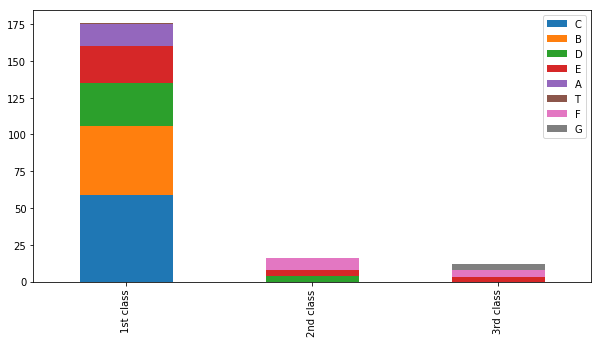

In [1044]:
df=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index=['1st class','2nd class','3rd class']
df.plot(kind="bar", stacked=True, figsize=(10,5))

In [1045]:
cabin_mapping={"A":0, "B":0.4, "C":0.8, "D":1.2, "E":1.6, "F":2, "G":2.4,"T":2.8}
for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].map(cabin_mapping)  

In [1046]:
train['Cabin'].fillna(train.groupby("Pclass")['Cabin'].transform("median"),inplace=True)
test['Cabin'].fillna(test.groupby("Pclass")['Cabin'].transform("median"),inplace=True)

In [1047]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,2.0,1,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0
5,6,0,3,0,2.0,0,0,330877,0.0,2.0,2,0
6,7,0,1,0,3.0,0,0,17463,2.0,1.6,0,0
7,8,0,3,0,0.0,3,1,349909,1.0,2.0,0,3
8,9,1,3,1,2.0,0,2,347742,0.0,2.0,0,2
9,10,1,2,1,1.0,1,0,237736,2.0,1.8,1,2


In [1048]:
train['FamilySize']=train['SibSp']+train['Parch']+1
test['FamilySize']=test['SibSp']+test['Parch']+1

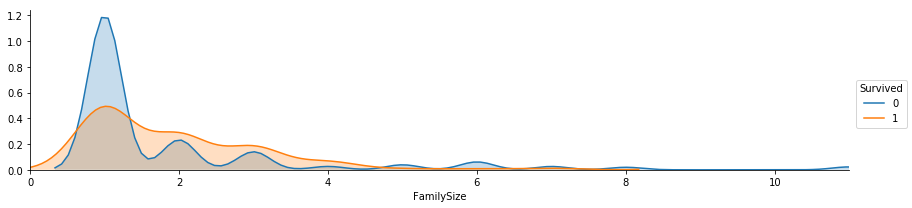

In [1049]:
facet=sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'FamilySize', shade=True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()

In [1050]:
family_mapping={1:0, 2:0.4, 3:0.8, 4:1.2, 5:1.6, 6:2, 7:2.4,8:2.8, 9:3.2, 10:3.6, 11:4.0}
for dataset in train_test_data:
    dataset['FamilySize']=dataset['FamilySize'].map(family_mapping)  

In [1051]:
train=train.drop(['Ticket', 'SibSp', 'Parch'], axis=1)

In [1052]:
test=test.drop(['Ticket', 'SibSp', 'Parch'], axis=1)

In [1053]:
train
train_data=train.drop('Survived', axis=1)

In [1054]:
target=train['Survived']


In [1055]:
train_data.shape

(891, 9)

In [1056]:
target.shape

(891,)

In [1057]:
train_data=train_data.drop('PassengerId', axis=1)

In [1058]:
train_data.shape

(891, 8)

In [1059]:
train_data

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,2.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,2.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0
5,3,0,2.0,0.0,2.0,2,0,0.0
6,1,0,3.0,2.0,1.6,0,0,0.0
7,3,0,0.0,1.0,2.0,0,3,1.6
8,3,1,2.0,0.0,2.0,0,2,0.8
9,2,1,1.0,2.0,1.8,1,2,0.4


In [1060]:
# 모든 데이터 수치화
# 여기까지 특성 공학 작업 종료(전처리 종료)
# -------------------------------------------------------------
# 교차 검증(cross validation(k-fold))

# k가 5라고 하면, 전체 데이터가 100개인 경우, 20개씩으로 나누어짐
#                   1   2   3   4   5
# 교차검증의 경우, 20  20  20  20  20
# 1) 1,2,3,4 : 모델링, 5: 테스트 => 정확도 80%
# 2) 1,2,3,5 : 모델링, 4: 테스트 => 정확도 70%
# .....
# 5) 2,3,4,5 : 모델링, 1: 테스트 => 정확도 90%
        
# 전체정확도 : 5번의 검증에 따른 정확도의 평균
    
    
# ------------------------------------------------------------    
# x1 x2 x3  yhat     y(생존여부)
# 실제 테스트 데이터에서는 문제만 준다(결과인 y는 빼고)
# yhat과 y값이 같으면 정확도 높음!


# 트레인 데이터 : 890, 테스트 데이터 : 400
# 89 * 10개 fold -> 교차검증 => 다양한 알고리즘 적용 => 가장 우수한 알고리즘 찾음
# => 테스트 데이터를 우수한 알고리즘에 적용

교차검증 코드 실습

In [1061]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [1062]:
# 교차 검증을 하기위한 개체 생성(K-fold)
kfold=KFold(n_splits=10,shuffle=True,random_state=0) # 속성값이 10개로 분리
# random_state=0 : 난수 발생

In [1063]:
# 1) train.info() # 테스트 데이터의 문제와 답이 있음, -> 모델 작성할 때 사용
# 2) train_data.info() # 테스트 데이터의 문제만 있음
# 3) target # 테스트 데이터의 정답만 있음

In [1064]:
train=train.drop('PassengerId',axis=1)

In [1115]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null float64
dtypes: float64(4), int64(5)
memory usage: 62.7 KB


In [1116]:
# Knn 알고리즘 : K nearest neighbors
# K만큼에 가까운 이웃들을 조사하겠다(= 유유상종)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

clf=KNeighborsClassifier(n_neighbors=3) # 분류기 생성
score=cross_val_score(clf,train_data,target,cv=kfold) # (clf, 문제, 답)
print(score) # 정확도

[0.74444444 0.84269663 0.78651685 0.83146067 0.71910112 0.80898876
 0.76404494 0.78651685 0.74157303 0.80898876]


In [1117]:
# 다 합친다음 평균 구하기
import numpy as np
round(np.mean(score)*100,2) # 2 : 둘째자리까지 출력

78.34

In [1118]:
clf=GaussianNB()
score=cross_val_score(clf,train_data,target,cv=kfold)
print(score)
round(np.mean(score)*100,2)

[0.85555556 0.75280899 0.74157303 0.7752809  0.69662921 0.80898876
 0.73033708 0.80898876 0.85393258 0.83146067]


78.56

In [1143]:
#test_data["Fare"].isnull().value_counts()
#test_data["Title"]

# 2) Fare와 Title에 대한 NaN값을 중앙값으로 변환!
test_data["Fare"].fillna(test_data["Fare"].median(),inplace=True)
test_data["Title"].fillna(test_data["Title"].median(),inplace=True)
# test_data[test_data["Title"].isnull()]
test_data.info()
# test_data=test_data.drop('Name',axis=1) # 1) name 컬럼 반드시 먼저 실행해서 drop 시켜준다음에!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass        418 non-null int64
Sex           418 non-null int64
Age           418 non-null float64
Fare          418 non-null float64
Cabin         418 non-null float64
Embarked      418 non-null int64
Title         418 non-null float64
FamilySize    418 non-null float64
dtypes: float64(5), int64(3)
memory usage: 26.2 KB


In [1144]:
# 지금까지는 나이브 베이즈 분류기가 가장 성능이 좋았음, 그래서 일단 이걸로 제출
clf=GaussianNB()
clf.fit(train_data,target)
# fit : 주어진 데이터에 대해 잘 설명할 수 있는 모델을 만든다(= 모델을 만드는 함수)
# train_data와 target을 기반으로 모델 제작

# test_data=test.drop("PassengerId",axis=1)
prediction=clf.predict(test_data)
test_data.info()
print(prediction)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass        418 non-null int64
Sex           418 non-null int64
Age           418 non-null float64
Fare          418 non-null float64
Cabin         418 non-null float64
Embarked      418 non-null int64
Title         418 non-null float64
FamilySize    418 non-null float64
dtypes: float64(5), int64(3)
memory usage: 26.2 KB
[0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0

In [1145]:
submission=pd.DataFrame({
    'PassengerId':test['PassengerId'],
    'Survived':prediction  
})
submission.to_csv("submission.csv",index=False)
# test

In [1146]:
ss=pd.read_csv("submission.csv")
print(ss.head())

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


In [1147]:
# DecisionTreeClassifier 실습
clf=DecisionTreeClassifier()
score=cross_val_score(clf,train_data,target,cv=kfold)
print(score)
round(np.mean(score)*100,2)

[0.81111111 0.87640449 0.76404494 0.80898876 0.85393258 0.80898876
 0.83146067 0.82022472 0.78651685 0.83146067]


81.93

In [1148]:
# RandomForestClassifier 실습
clf=RandomForestClassifier()
score=cross_val_score(clf,train_data,target,cv=kfold)
print(score)
round(np.mean(score)*100,2)

[0.82222222 0.87640449 0.76404494 0.76404494 0.87640449 0.83146067
 0.83146067 0.80898876 0.79775281 0.83146067]


82.04

In [1149]:
# RandomForestClassifier 실습
clf=RandomForestClassifier()
score=cross_val_score(clf,train_data,target,cv=kfold)
print(score)
round(np.mean(score)*100,2)

[0.82222222 0.88764045 0.75280899 0.85393258 0.85393258 0.82022472
 0.83146067 0.82022472 0.78651685 0.85393258]


82.83

In [1150]:
# SVC 실습
clf=SVC()
score=cross_val_score(clf,train_data,target,cv=kfold)
print(score)
round(np.mean(score)*100,2)

[0.82222222 0.79775281 0.82022472 0.83146067 0.83146067 0.82022472
 0.83146067 0.87640449 0.82022472 0.84269663]


82.94

In [1151]:
submission=pd.DataFrame({
    'PassengerId':test['PassengerId'],
    'Survived':prediction  
})
submission.to_csv("submission.csv",index=False)
ss=pd.read_csv("submission.csv")
print(ss.head())

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
